In [17]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


import warnings
warnings.filterwarnings('ignore')

In [18]:
data =pd.read_csv('Test_Sales_LinReg.csv')
data.head()

Republic  NDTV   TV5   TV9  AajTak  sales
0       8.7  48.9   4.0  75.0    49.0    7.2
1      57.5  32.8  65.9  23.5    57.5   11.8
2     120.2  19.6   7.2  11.6    18.5   13.2
3       8.6   2.1  46.0   1.0     2.6    4.8
4     199.8   2.6  52.9  21.2     2.9   10.6

In [19]:
data.describe()

Republic        NDTV         TV5         TV9      AajTak       sales
count  295.000000  300.000000  305.000000  297.000000  300.000000  305.000000
mean   148.136610   22.341333   29.459344   28.862626   23.517967   13.811475
std     87.330161   14.781927   20.290023   21.411180   15.853789    5.192185
min      0.700000    0.300000    0.300000    0.300000    0.300000    1.600000
25%     74.050000    9.125000   15.900000   10.900000   10.000000   10.300000
50%    149.800000   21.050000   26.200000   23.500000   21.300000   12.800000
75%    221.450000   35.650000   39.600000   43.000000   36.900000   17.200000
max    296.400000   49.400000  114.000000  114.000000   75.500000   27.000000

In [20]:
data.isnull().sum()

Republic    10
NDTV         5
TV5          0
TV9          8
AajTak       5
sales        0
dtype: int64

In [21]:
data['Republic'] = data['Republic'].fillna(data['Republic'].mean())

data['NDTV'] = data['NDTV'].fillna(data['NDTV'].mean())

data['TV9']  = data['TV9'].fillna(data['TV9'].mean())

data['AajTak']  = data['AajTak'].fillna(data['AajTak'].mean())

In [22]:
ata.describe()

Republic        NDTV         TV5         TV9      AajTak       sales
count  295.000000  300.000000  305.000000  297.000000  300.000000  305.000000
mean   148.136610   22.341333   29.459344   28.862626   23.517967   13.811475
std     87.330161   14.781927   20.290023   21.411180   15.853789    5.192185
min      0.700000    0.300000    0.300000    0.300000    0.300000    1.600000
25%     74.050000    9.125000   15.900000   10.900000   10.000000   10.300000
50%    149.800000   21.050000   26.200000   23.500000   21.300000   12.800000
75%    221.450000   35.650000   39.600000   43.000000   36.900000   17.200000
max    296.400000   49.400000  114.000000  114.000000   75.500000   27.000000

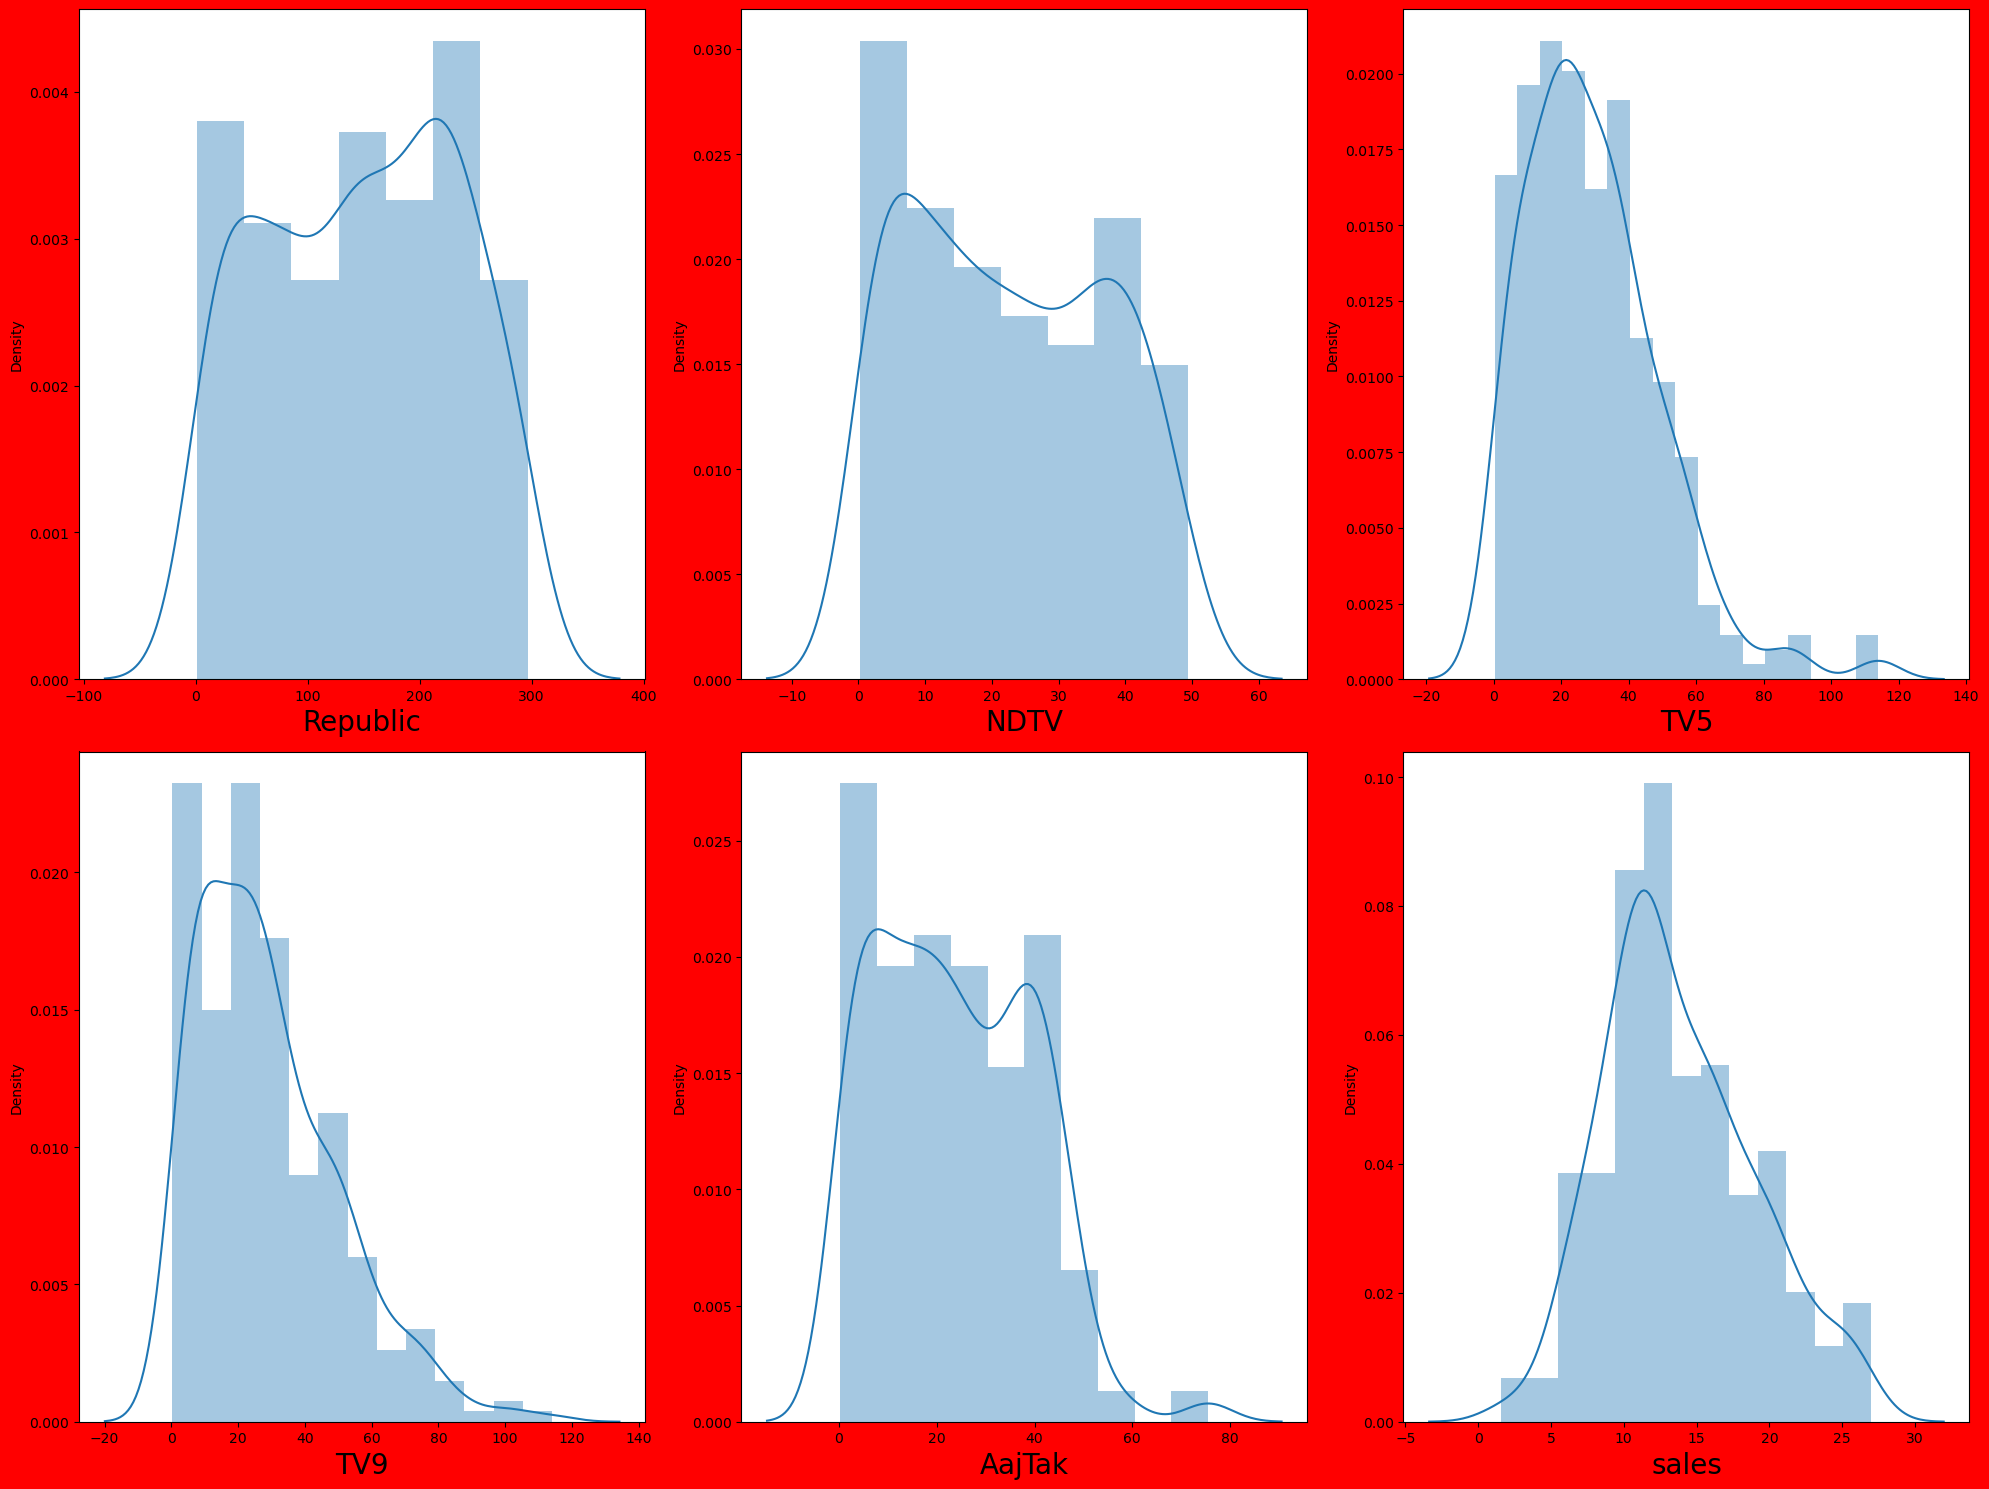

In [23]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.tight_layout()

In [24]:
y = data['sales']
X = data.drop(columns = ['sales'])

In [25]:
y

0       7.2
1      11.8
2      13.2
3       4.8
4      10.6
       ... 
300    15.9
301     6.7
302    10.8
303     9.9
304     5.9
Name: sales, Length: 305, dtype: float64

In [26]:
x

NameError: name 'x' is not defined

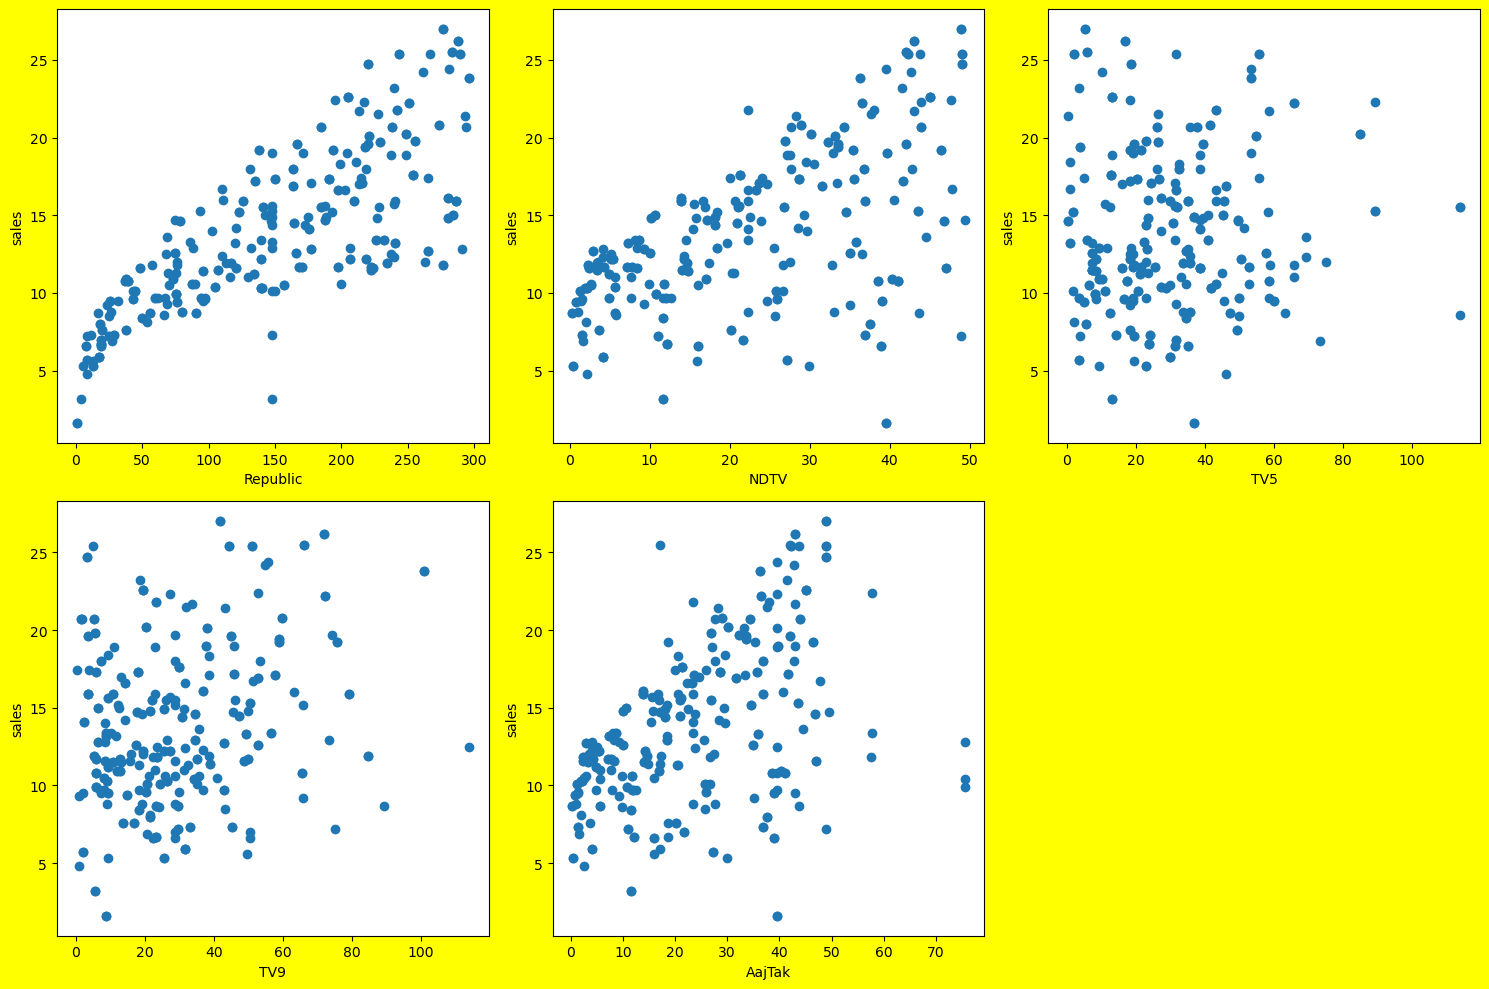

In [27]:
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in X:
    if plotnumber<=6 :
        ax = plt.subplot(2,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('sales',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [28]:
X.drop(columns=['TV5','TV9'],axis=1,inplace=True)

In [35]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=100)
y_train.head()

249    19.0
257    13.3
120    10.8
88     14.8
177     9.9
Name: sales, dtype: float64

In [37]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [38]:
X.tail(2)

Republic  NDTV  AajTak
303      75.5  10.8    75.5
304      17.2   4.1    17.2

In [39]:
print ('Sales prediction : ',regression.predict(scaler.transform([[75.5,	10.8,	75.5]])))

Sales prediction :  [10.41077521]


In [40]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [42]:
r2_score(y_test,y_pred)

0.8960140881186806

In [46]:
y_pred = regression.predict(x_test)

In [47]:
mean_absolute_error(y_test,y_pred)

1.368882704125627

In [48]:
mean_squared_error(y_test,y_pred)

2.8778431714342365

In [49]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.696420694118719